In [2]:
# data => letterdata.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
df.shape

(20000, 17)

In [10]:
x = df.drop('letter', axis = 1)
y = df['letter']

In [12]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

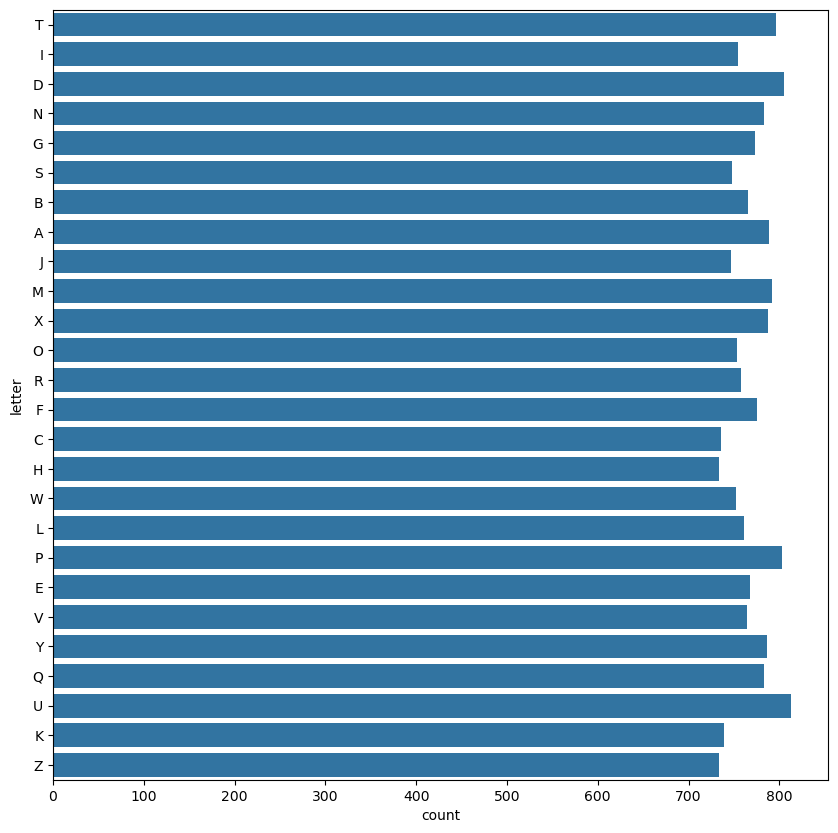

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(y = y);

#### cross validation

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.2)

In [21]:
x_train.shape

(16000, 16)

In [23]:
y_train.shape

(16000,)

#### build the model

In [26]:
from sklearn.svm import SVC

In [54]:
svc = SVC(kernel= 'poly')

In [56]:
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [57]:
y_pred = svc.predict(x_test)

In [58]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [59]:
accuracy_score(y_test, y_pred)

0.95425

In [64]:
# linear = 0.865
# poly = 0.954
# sigmoid = 0.029
# RBF = 0.9335

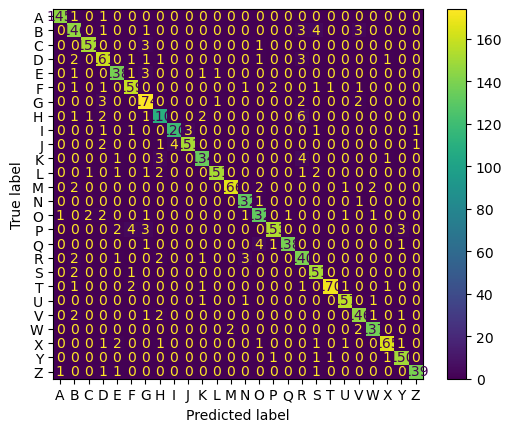

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0.95      0.97       145
           R       0.88    

In [72]:
# predict

new = [[5, 6, 9, 5, 7, 10, 13, 0, 6, 6, 11, 8, 3, 8, 0, 8]]

In [74]:
svc.predict(new)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['T'], dtype=object)